In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:


df = pd.read_csv("/content/spam.csv", encoding="latin1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **data cleaning**

In [ ]:
df.iloc[0,0:2]

,0
v1,ham
v2,"Go until jurong point, crazy.. Available only ..."


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [ ]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [ ]:
df['target']=df['target'].replace({"ham":0,"spam":1})

/tmp/ipython-input-669495014.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target']=df['target'].replace({"ham":0,"spam":1})


In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()

,0
target,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(403)

In [ ]:
df=df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(5169, 2)

# **EDA**

In [ ]:
df['target'].value_counts()

,count
target,
0,4516
1,653


([<matplotlib.patches.Wedge at 0x784aaf7fb2f0>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

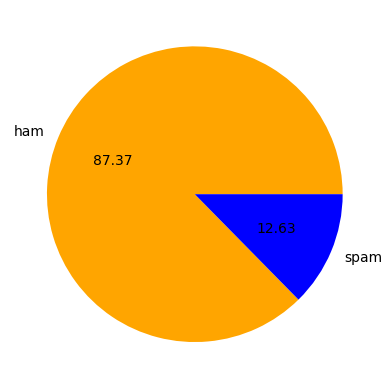

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f',colors=['orange','blue'])

In [ ]:
df['num_characters']=df['text'].apply(len)

In [ ]:
df['num_words']=df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [ ]:
df['num_sentences']=df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==0].describe()

,target,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [ ]:
df[df['target']==1].describe()

,target,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


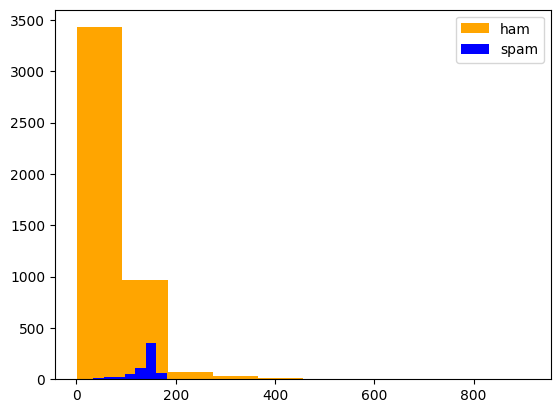

In [ ]:
plt.hist(df[df['target']==0]['num_characters'],color='orange',label='ham')
plt.hist(df[df['target']==1]['num_characters'],color='blue',label='spam')
plt.legend()


# **Data Processing**
  * lowercase
  * tokenization
  * remove special characters
  * removing stop words and punchuation
  * stemming

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [ ]:
def transform_text(text):
 text=text.lower()
 text=nltk.word_tokenize(text)
 y=[]
 for i in text:
    if i.isalnum() :
      y.append(i)
 text=y.copy()
 y.clear()
 for i in text:
    if i not in stopwords.words('english'):
      y.append(i)
 text=y.copy()
 y.clear()
 for i in text :
     y.append(ps.stem(i))
 return ' '.join(y)

In [ ]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [ ]:
df['transformed_text']=df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus=[]
for sent in df[df['target']==1]['transformed_text'].tolist() :
  for word in sent.split():
      spam_corpus.append(word)



In [ ]:
from collections import Counter
Counter(spam_corpus).most_common()[0:30]

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [ ]:
ham_corpus=[]
for sent in df[df['target']==0]['transformed_text'].tolist() :
  for word in sent.split():
      ham_corpus.append(word)

In [ ]:
Counter(ham_corpus).most_common()[0:30]

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [ ]:
len(ham_corpus)

35404

# **model building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df['transformed_text']).toarray()

In [ ]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y=df['target'].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

**using logistic regression**



In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
x_test.shape

(1034, 6708)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9787234042553191


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[895   1]
 [ 21 117]]


(array([3.555e+03, 1.498e+03, 6.700e+01, 3.200e+01, 8.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([  1. ,  22.9,  44.8,  66.7,  88.6, 110.5, 132.4, 154.3, 176.2,
        198.1, 220. ]),
 <BarContainer object of 10 artists>)

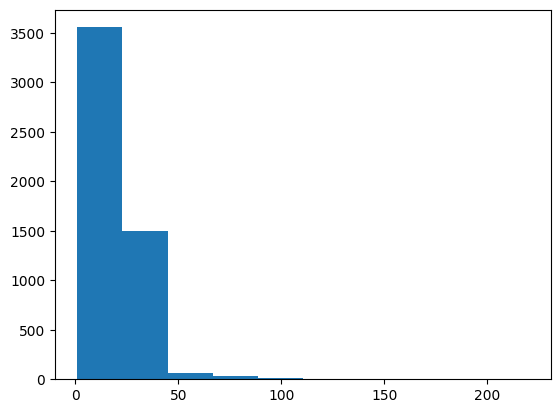

In [ ]:
plt.hist(df['num_words'],bins=10)

**using multinomialnb**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
mb=MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
y_pred=mb.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9642166344294004


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[871  25]
 [ 12 126]]


# **testing spam message**




In [ ]:
spam_text=''' Dear Customer, congratulations — you’ve been pre‑selected for an exclusive $2,500 gift card as part of our VIP rewards program; simply click the link below (http://example-claim-now.com
), confirm your account details to verify your identity, and the card will be sent immediately — this one‑time offer expires in 12 hours, so act now to claim your reward.'''
spam_v_text=cv.transform([spam_text]).toarray()

In [ ]:
model.predict(spam_v_text)

array([1])

# **testing ham message**

In [ ]:
ham_text=''' Hi Sarah, I just wanted to remind you about our team meeting tomorrow at 10:00 AM in the main conference room. Please make sure to bring the latest project reports and updates so we can review progress and plan the next steps. Looking forward to discussing everything with you and the rest of the team.'''
ham_v_text=cv.transform([ham_text]).toarray()

In [ ]:
model.predict(ham_v_text)

array([0])

# **function for predicting**

In [ ]:
def is_spam(text):
  v_text=cv.transform([text]).toarray()
  predicted_val=list(model.predict(v_text))
  if predicted_val==[1] :
    print("spam")
  else :
    print("ham")

In [ ]:
is_spam(spam_text)

spam


In [ ]:
import pickle
with open('model.pkl','wb') as f1 :
  pickle.dump(model,f1)
with open('counter.pkl','wb') as f2 :
  pickle.dump(cv,f2)

In [61]:
print(5)

5
